In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [68]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [69]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [70]:
star_wars.iloc[0,15:29].values

array(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'], dtype=object)

Remove null rows from "RespondentID" column.

In [71]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

Check null value in "RespondentID" column.

In [72]:
star_wars["RespondentID"].isnull().sum()

0

Convert the "Have you seen any of the 6 films in the Star Wars franchise?" and "Do you consider yourself to be a fan of the Star Wars film franchise?" columns to boolean type to make it easier to analyze.

In [73]:
yes_no = {"Yes":True, "No":False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

#star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)
#star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yes_no)
         

In [74]:
print(star_wars.iloc[:,1].value_counts(dropna=False))
print(star_wars.iloc[:,2].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Convert six columns represent a single checkbox question, that checked a series to boolean type. And rename columns to easier to read.

In [75]:
star_wars_name ={
    "Star Wars: Episode I  The Phantom Menace":True,
    "Star Wars: Episode II  Attack of the Clones":True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi":True,
    np.NaN:False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(star_wars_name)

In [76]:
star_col = star_wars.columns[3:9]
star_col_re ={}
x = 0
for name in star_col:
    x += 1
    star_col_re[name] = "seen_" + str(x)
        
star_wars = star_wars.rename(columns=star_col_re)

In [77]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [78]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [79]:
star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].astype(float)

In [80]:
star_col = star_wars.columns[9:15]
star_col_re = {}
x = 0
for name in star_col:
    x += 1
    star_col_re[name] = "ranking_" + str(x)

star_wars = star_wars.rename(columns=star_col_re)

In [81]:
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [82]:
star_wars.iloc[:,9:15]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


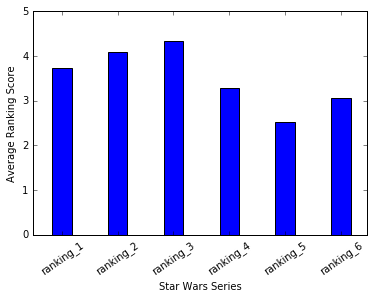

In [83]:
%matplotlib inline

x_col_name = star_wars.columns[9:15]
y_ranking_mean = star_wars.iloc[:,9:15].mean()

N = 6
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
ax1 = ax.bar(ind + width, y_ranking_mean, width)
ax.set_ylim(0,5)
ax.set_xticklabels(x_col_name, rotation=35)
ax.set_xticks(ind + 1.5 * width)
ax.set_ylabel("Average Ranking Score")
ax.set_xlabel("Star Wars Series")

The original movies have higher rated than the newer one.

In [84]:
star_wars.iloc[:,3:9].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

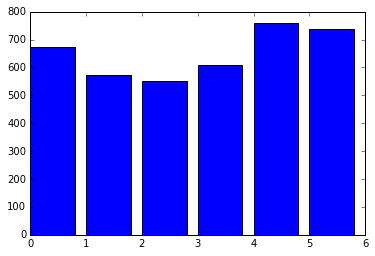

In [85]:
plt.bar(range(6), star_wars.iloc[:,3:9].sum())

From the bar chart,it show the original movies were seen by more respondent.The original seem more popular than the newer movies. 

In [86]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
print("Males\n{}".format(males.iloc[:,9:15].mean()))
print("Females\n{}".format(females.iloc[:,9:15].mean()))

Males
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64
Females
ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


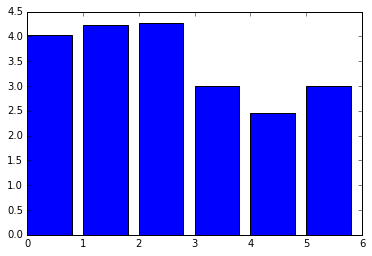

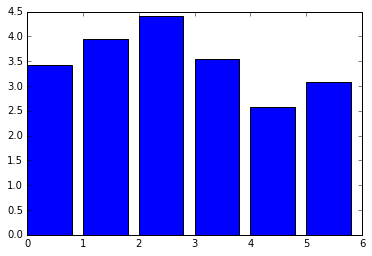

In [87]:
plt.bar(range(6), males.iloc[:,9:15].mean())
plt.show()

plt.bar(range(6), females.iloc[:,9:15].mean())
plt.show()

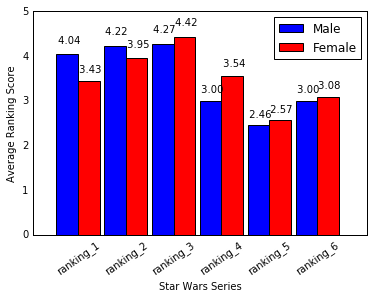

In [88]:
x_col_name = star_wars.columns[9:15]
y_male_mean = males.iloc[:,9:15].mean()
y_female_mean = females.iloc[:,9:15].mean()

N = 6
ind = np.arange(N)
width = 0.45

fig, ax = plt.subplots()
ax1 = ax.bar(ind + 0.5 , y_male_mean, width, color="b")
ax2 = ax.bar(ind + 0.5 + width, y_female_mean, width, color="r")

# for key,spine in ax.spines.items():
#         spine.set_visible(False)
ax.tick_params(top='off', bottom='off', right='off', left='off')
ax.set_ylim(0,5)
ax.set_xticklabels(x_col_name, rotation=35)
ax.set_xticks(ind + 0.5 + width)
ax.set_ylabel("Average Ranking Score")
ax.set_xlabel("Star Wars Series")
ax.legend((ax1[0], ax2[0]),["Male", "Female"])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{: 3.2f}'.format(float(height)),
                ha='center', va='bottom')

autolabel(ax1)
autolabel(ax2)

plt.show()

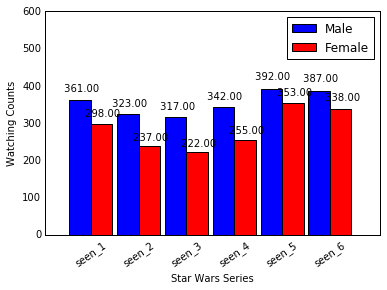

In [89]:
x_col_name = star_wars.columns[3:9]
y_male_sum = males.iloc[:,3:9].sum()
y_female_sum = females.iloc[:,3:9].sum()

N = 6
ind = np.arange(N)
width = 0.45

fig, ax = plt.subplots()
ax1 = ax.bar(ind + 0.5 , y_male_sum, width, color="b")
ax2 = ax.bar(ind + 0.5 + width, y_female_sum, width, color="r")

# for key,spine in ax.spines.items():
#         spine.set_visible(False)
ax.tick_params(top='off', bottom='off', right='off', left='off')
ax.set_ylim(0,600)
ax.set_xticklabels(x_col_name, rotation=35)
ax.set_xticks(ind + 0.5 + width)
ax.set_ylabel("Watching Counts")
ax.set_xlabel("Star Wars Series")
ax.legend((ax1[0], ax2[0]),["Male", "Female"])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{: 3.2f}'.format(float(height)),
                ha='center', va='bottom')

autolabel(ax1)
autolabel(ax2)

plt.show()

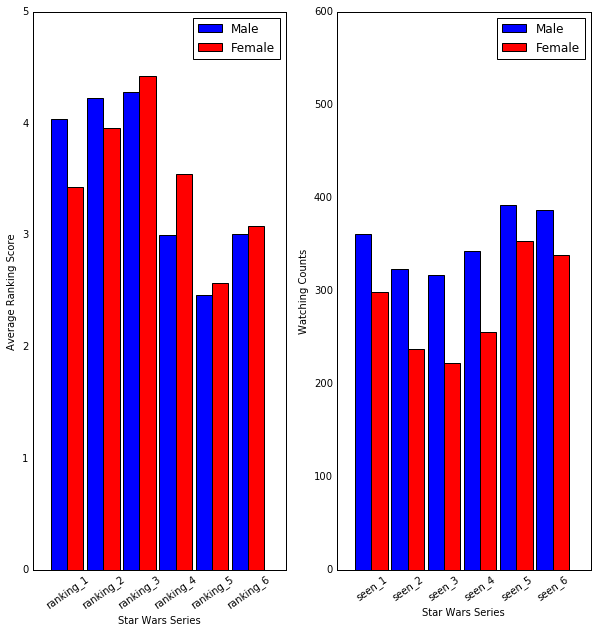

In [90]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

x_col_name = star_wars.columns[9:15]
y_male_mean = males.iloc[:,9:15].mean()
y_female_mean = females.iloc[:,9:15].mean()

N = 6
ind = np.arange(N)
width = 0.45


axes1 = ax1.bar(ind + 0.5 , y_male_mean, width, color="b")
axes2 = ax1.bar(ind + 0.5 + width, y_female_mean, width, color="r")

# for key,spine in ax.spines.items():
#         spine.set_visible(False)
ax1.tick_params(top='off', bottom='off', right='off', left='off')
ax1.set_ylim(0,5)
ax1.set_xticklabels(x_col_name, rotation=35)
ax1.set_xticks(ind + 0.5 + width)
ax1.set_ylabel("Average Ranking Score")
ax1.set_xlabel("Star Wars Series")
ax1.legend((axes1[0], axes2[0]),["Male", "Female"])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{: 3.2f}'.format(float(height)),
                ha='center', va='bottom')

autolabel(axes1)
autolabel(axes2)



x_col_name = star_wars.columns[3:9]
y_male_sum = males.iloc[:,3:9].sum()
y_female_sum = females.iloc[:,3:9].sum()

N = 6
ind = np.arange(N)
width = 0.45


axes1 = ax2.bar(ind + 0.5 , y_male_sum, width, color="b")
axes2 = ax2.bar(ind + 0.5 + width, y_female_sum, width, color="r")

# for key,spine in ax.spines.items():
#         spine.set_visible(False)
ax2.tick_params(top='off', bottom='off', right='off', left='off')
ax2.set_ylim(0,600)
ax2.set_xticklabels(x_col_name, rotation=35)
ax2.set_xticks(ind + 0.5 + width)
ax2.set_ylabel("Watching Counts")
ax2.set_xlabel("Star Wars Series")
ax2.legend((axes1[0], axes2[0]),["Male", "Female"])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{: 3.2f}'.format(float(height)),
                ha='center', va='bottom')

autolabel(axes1)
autolabel(axes2)

plt.show()

More males watches episodes 1-3, but maled liked them far less than females did.The episodes 5 is the best one of this series both in males and females. 

In [91]:
char_name = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda']
char_re_name = {}
x = 0
for col in star_wars.columns[15:29]:
    char_re_name[col] = char_name[x]
    x += 1 

star_wars = star_wars.rename(columns=char_re_name)
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

In [92]:
star_wars.iloc[:,15].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In [93]:
star_wars.iloc[:,27].value_counts()

Neither favorably nor unfavorably (neutral)    207
Somewhat favorably                             183
Very favorably                                 168
Unfamiliar (N/A)                               164
Somewhat unfavorably                            58
Very unfavorably                                34
Name: Padme Amidala, dtype: int64

In [95]:
char_score = {
    "Very favorably":5,
    "Somewhat favorably":4,
    "Neither favorably nor unfavorably (neutral)":3,
    "Somewhat unfavorably ":2,
    "Very unfavorably":1,
    "Unfamiliar (N/A)":0
}
for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(char_score)

In [98]:
star_wars.iloc[:,15:29].describe()
for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].fillna(star_wars[col].mean())

In [102]:
star_wars.iloc[:,15:29].mean()

Han Solo                4.612667
Luke Skywalker          4.588020
Princess Leia Organa    4.548230
Anakin Skywalker        3.709459
Obi Wan Kenobi          4.561812
Emperor Palpatine       2.526810
Darth Vader             3.639503
Lando Calrissian        3.062087
Boba Fett               2.920391
C-3P0                   4.390547
R2 D2                   4.545122
Jar Jar Binks           2.470097
Padme Amidala           2.945767
Yoda                    4.599022
dtype: float64

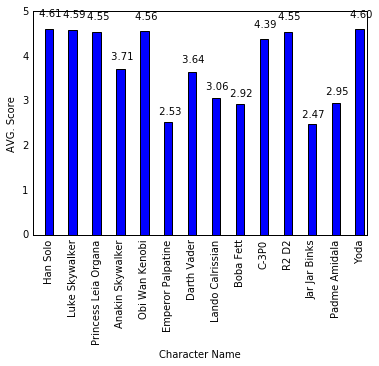

In [99]:
x_col = star_wars.columns[15:29]
y_char_mean = star_wars.iloc[:,15:29].mean()

N = len(x_col)
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
ax1 = ax.bar(ind + 0.5, y_char_mean, width, color="b")
ax.set_xticklabels(x_col, rotation=90)
ax.set_xticks(ind+0.5+width/2)
ax.set_ylabel("AVG. Score")
ax.set_xlabel("Character Name")
ax.set_ylim(0,5)
ax.tick_params(top="off", bottom="off", left="off", right="off")
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{: 3.2f}'.format(float(height)),
                ha='center', va='bottom')

autolabel(ax1)

Han Solo is the favorite character following by Yoda and Luke Skywalker. Jar Jar Binks is the less favorite one.